<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_transformer_encoder_daug_resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [ ]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [ ]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [ ]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-07-04 06:34:00--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-07-04 06:34:01--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [          <=>       ]  75.50M  14.2MB/s    in 6.1s    

2024-07-04 06:34:07 (12.4 MB/s) - ‘master.zip’ saved [79168767]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
a7fe226267074d0c9fb03cfa3a74086a9188d974
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [ ]:
!mv master/trado_samples-main/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip

In [ ]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [ ]:
!pip3 install torchinfo

In [ ]:
import copy
import json
import math
import os
import random
import sys
from functools import partial
from inspect import signature
from pathlib import Path
from typing import (
    Any,
    Dict,
    List
)

# Third party's modules
import cv2

import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchinfo import summary

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    USE_FACE,
    USE_LHAND,
    USE_POSE,
    USE_RHAND,
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    Identity,
    GPoolRecognitionHead,
    TransformerEncoderLayer,
    TransformerEncoder,
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor,
    matrix_interp
)
from modules_gislr.utils import (
    make_causal_mask,
    select_reluwise_activation
)

# 3. Implement feature resizing.

In [ ]:
class SelectiveResize():
    def __init__(self,
                 min_tlen=8,
                 max_tlen=None):
        assert min_tlen is not None or max_tlen is not None
        self.min_tlen = min_tlen
        self.max_tlen = max_tlen

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:

        feature = data["feature"]
        orig_shape = feature.shape
        tlen = orig_shape[1]
        resize_mode = None
        if self.min_tlen and tlen < self.min_tlen:
            resize_mode = "enlarge"
        if self.max_tlen and tlen > self.max_tlen:
            resize_mode = "shrink"
        if resize_mode is None:
            return data

        # Apply warping.
        # `[C, T, J] -> [T, C*J]`
        feature = feature.transpose([1, 0, 2]).reshape([tlen, -1])

        assert len(feature.shape) == 2, f"{feature.shape}"
        aug_tlen = self.min_tlen if resize_mode == "enlarge" else self.max_tlen

        x = np.linspace(0, tlen-1, num=aug_tlen)
        xs = np.arange(tlen)
        newfeature = matrix_interp(x, xs, feature)
        # `[T, C*J] -> [T, C, J] -> [C, T, J]`
        newfeature = newfeature.reshape([-1, orig_shape[0], orig_shape[2]])
        newfeature = newfeature.transpose([1, 0, 2])

        data["feature"] = newfeature
        return data

# 4. Implement Transformer with strided pooling

In [ ]:
class TransformerEnISLR(nn.Module):
    def __init__(self,
                 in_channels,
                 inter_channels,
                 out_channels,
                 activation="relu",
                 pooling_type="none",
                 tren_num_layers=1,
                 tren_num_heads=1,
                 tren_dim_ffw=256,
                 tren_dropout_pe=0.1,
                 tren_dropout=0.1,
                 tren_layer_norm_eps=1e-5,
                 tren_norm_first=True,
                 tren_add_bias=True,
                 tren_add_tailnorm=True):
        super().__init__()

        # Feature extraction.
        self.linear = nn.Linear(in_channels, inter_channels)
        self.activation = select_reluwise_activation(activation)

        if pooling_type == "none":
            self.pooling = Identity()
        elif pooling_type == "average":
            self.pooling = nn.AvgPool2d(
                kernel_size=[2, 1],
                stride=[2, 1],
                padding=0)
        elif pooling_type == "max":
            self.pooling = nn.MaxPool2d(
                kernel_size=[2, 1],
                stride=[2, 1],
                padding=0)

        # Transformer-Encoder.
        enlayer = TransformerEncoderLayer(
                dim_model=inter_channels,
                num_heads=tren_num_heads,
                dim_ffw=tren_dim_ffw,
                dropout=tren_dropout,
                activation=activation,
                layer_norm_eps=tren_layer_norm_eps,
                norm_first=tren_norm_first,
                add_bias=tren_add_bias)
        self.tr_encoder = TransformerEncoder(
            encoder_layer=enlayer,
            num_layers=tren_num_layers,
            dim_model=inter_channels,
            dropout_pe=tren_dropout_pe,
            layer_norm_eps=tren_layer_norm_eps,
            norm_first=tren_norm_first,
            add_bias=tren_add_bias,
            add_tailnorm=tren_add_tailnorm)

        self.head = GPoolRecognitionHead(inter_channels, out_channels)

    def forward(self,
                feature,
                feature_causal_mask=None,
                feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        if torch.isnan(feature).any():
            raise ValueError()
        feature = self.activation(feature)
        if torch.isnan(feature).any():
            raise ValueError()

        # Apply pooling.
        feature = self.pooling(feature)
        if feature_pad_mask is not None:
            # Cast to apply pooling.
            feature_pad_mask = feature_pad_mask.to(feature.dtype)
            feature_pad_mask = self.pooling(feature_pad_mask.unsqueeze(-1)).squeeze(-1)
            # Binarization.
            # This removes averaged signals with padding.
            feature_pad_mask = feature_pad_mask > 0.5
            if feature_causal_mask is not None:
                feature_causal_mask = make_causal_mask(feature_pad_mask)

        feature = self.tr_encoder(
            feature=feature,
            causal_mask=feature_causal_mask,
            src_key_padding_mask=feature_pad_mask)
        if torch.isnan(feature).any():
            raise ValueError()

        # `[N, T, C] -> [N, C, T]`
        logit = self.head(feature.permute([0, 2, 1]), feature_pad_mask)
        if torch.isnan(feature).any():
            raise ValueError()
        return logit

# 5. Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/32319.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])

transforms_default = Compose([ToTensor()])

transforms_resize_32 = Compose([
    SelectiveResize(min_tlen=8, max_tlen=32),
    ToTensor()])

transforms_resize_64 = Compose([
    SelectiveResize(min_tlen=8, max_tlen=64),
    ToTensor()])

transforms_resize_128 = Compose([
    SelectiveResize(min_tlen=8, max_tlen=128),
    ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

for trans in [transforms_default, transforms_resize_32, transforms_resize_64, transforms_resize_128]:
    dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=trans)
    dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
    try:
        data = next(iter(dataloader))
        feature_origin = data["feature"]

        print(feature_origin.shape)
    except Exception as inst:
        print(inst)

torch.Size([2, 2, 232, 130])
torch.Size([2, 2, 32, 130])
torch.Size([2, 2, 64, 130])
torch.Size([2, 2, 128, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
out_channels = VOCAB
activation = "relu"
tren_num_layers = 2
tren_num_heads = 2
tren_dim_ffw = 256
tren_dropout_pe = 0.1
tren_dropout = 0.1
tren_layer_norm_eps = 1e-5
tren_norm_first = True
tren_add_bias = True
tren_add_tailnorm = True

pooling_type = "none"

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          pooling_type=pooling_type,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw0 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw1 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
print(attw0.shape, attw1.shape)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

# 6. Estimate model capcacity

### Default settings.

In [ ]:
pooling_type = "none"
max_tlen = 543

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          pooling_type=pooling_type,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
# input_size: `[N, C, T, J]`
summary(model, input_size=(batch_size, len(use_features), max_tlen, len(use_landmarks)))

Layer (type:depth-idx)                             Output Shape              Param #
TransformerEnISLR                                  [2, 10]                   --
├─Linear: 1-1                                      [2, 543, 64]              16,704
├─ReLU: 1-2                                        [2, 543, 64]              --
├─Identity: 1-3                                    [2, 543, 64]              --
├─TransformerEncoder: 1-4                          [2, 543, 64]              --
│    └─PositionalEncoding: 2-1                     [2, 543, 64]              --
│    │    └─Dropout: 3-1                           [2, 543, 64]              --
│    └─ModuleList: 2-2                             --                        --
│    │    └─TransformerEncoderLayer: 3-2           [2, 543, 64]              49,984
│    │    └─TransformerEncoderLayer: 3-3           [2, 543, 64]              49,984
│    └─LayerNorm: 2-3                              [2, 543, 64]              128
├─GPoolRecognitionHead

### pooling_type = "none", max_tlen = 32.

In [ ]:
pooling_type = "none"
max_tlen = 32

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          pooling_type=pooling_type,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
# input_size: `[N, C, T, J]`
summary(model, input_size=(batch_size, len(use_features), max_tlen, len(use_landmarks)))

Layer (type:depth-idx)                             Output Shape              Param #
TransformerEnISLR                                  [2, 10]                   --
├─Linear: 1-1                                      [2, 32, 64]               16,704
├─ReLU: 1-2                                        [2, 32, 64]               --
├─Identity: 1-3                                    [2, 32, 64]               --
├─TransformerEncoder: 1-4                          [2, 32, 64]               --
│    └─PositionalEncoding: 2-1                     [2, 32, 64]               --
│    │    └─Dropout: 3-1                           [2, 32, 64]               --
│    └─ModuleList: 2-2                             --                        --
│    │    └─TransformerEncoderLayer: 3-2           [2, 32, 64]               49,984
│    │    └─TransformerEncoderLayer: 3-3           [2, 32, 64]               49,984
│    └─LayerNorm: 2-3                              [2, 32, 64]               128
├─GPoolRecognitionHead

### pooling_type = "none", max_tlen = 64.

In [ ]:
pooling_type = "none"
max_tlen = 64

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          pooling_type=pooling_type,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
# input_size: `[N, C, T, J]`
summary(model, input_size=(batch_size, len(use_features), max_tlen, len(use_landmarks)))

Layer (type:depth-idx)                             Output Shape              Param #
TransformerEnISLR                                  [2, 10]                   --
├─Linear: 1-1                                      [2, 64, 64]               16,704
├─ReLU: 1-2                                        [2, 64, 64]               --
├─Identity: 1-3                                    [2, 64, 64]               --
├─TransformerEncoder: 1-4                          [2, 64, 64]               --
│    └─PositionalEncoding: 2-1                     [2, 64, 64]               --
│    │    └─Dropout: 3-1                           [2, 64, 64]               --
│    └─ModuleList: 2-2                             --                        --
│    │    └─TransformerEncoderLayer: 3-2           [2, 64, 64]               49,984
│    │    └─TransformerEncoderLayer: 3-3           [2, 64, 64]               49,984
│    └─LayerNorm: 2-3                              [2, 64, 64]               128
├─GPoolRecognitionHead

### pooling_type = "none", max_tlen = 128.

In [ ]:
pooling_type = "none"
max_tlen = 128

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          pooling_type=pooling_type,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
# input_size: `[N, C, T, J]`
summary(model, input_size=(batch_size, len(use_features), max_tlen, len(use_landmarks)))

Layer (type:depth-idx)                             Output Shape              Param #
TransformerEnISLR                                  [2, 10]                   --
├─Linear: 1-1                                      [2, 128, 64]              16,704
├─ReLU: 1-2                                        [2, 128, 64]              --
├─Identity: 1-3                                    [2, 128, 64]              --
├─TransformerEncoder: 1-4                          [2, 128, 64]              --
│    └─PositionalEncoding: 2-1                     [2, 128, 64]              --
│    │    └─Dropout: 3-1                           [2, 128, 64]              --
│    └─ModuleList: 2-2                             --                        --
│    │    └─TransformerEncoderLayer: 3-2           [2, 128, 64]              49,984
│    │    └─TransformerEncoderLayer: 3-3           [2, 128, 64]              49,984
│    └─LayerNorm: 2-3                              [2, 128, 64]              128
├─GPoolRecognitionHead

### pooling_type = "average", max_tlen = 128.

In [ ]:
pooling_type = "average"
max_tlen = 128

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          pooling_type=pooling_type,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
# input_size: `[N, C, T, J]`
summary(model, input_size=(batch_size, len(use_features), max_tlen, len(use_landmarks)))

Layer (type:depth-idx)                             Output Shape              Param #
TransformerEnISLR                                  [2, 10]                   --
├─Linear: 1-1                                      [2, 128, 64]              16,704
├─ReLU: 1-2                                        [2, 128, 64]              --
├─AvgPool2d: 1-3                                   [2, 64, 64]               --
├─TransformerEncoder: 1-4                          [2, 64, 64]               --
│    └─PositionalEncoding: 2-1                     [2, 64, 64]               --
│    │    └─Dropout: 3-1                           [2, 64, 64]               --
│    └─ModuleList: 2-2                             --                        --
│    │    └─TransformerEncoderLayer: 3-2           [2, 64, 64]               49,984
│    │    └─TransformerEncoderLayer: 3-3           [2, 64, 64]               49,984
│    └─LayerNorm: 2-3                              [2, 64, 64]               128
├─GPoolRecognitionHead

### pooling_type = "max", max_tlen = 128.

In [ ]:
pooling_type = "max"
max_tlen = 128

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          pooling_type=pooling_type,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
# input_size: `[N, C, T, J]`
summary(model, input_size=(batch_size, len(use_features), max_tlen, len(use_landmarks)))

Layer (type:depth-idx)                             Output Shape              Param #
TransformerEnISLR                                  [2, 10]                   --
├─Linear: 1-1                                      [2, 128, 64]              16,704
├─ReLU: 1-2                                        [2, 128, 64]              --
├─MaxPool2d: 1-3                                   [2, 64, 64]               --
├─TransformerEncoder: 1-4                          [2, 64, 64]               --
│    └─PositionalEncoding: 2-1                     [2, 64, 64]               --
│    │    └─Dropout: 3-1                           [2, 64, 64]               --
│    └─ModuleList: 2-2                             --                        --
│    │    └─TransformerEncoderLayer: 3-2           [2, 64, 64]               49,984
│    │    └─TransformerEncoderLayer: 3-3           [2, 64, 64]               49,984
│    └─LayerNorm: 2-3                              [2, 64, 64]               128
├─GPoolRecognitionHead

# 7. Train and evaluation

## 7.1 Set common parameters.

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


## 7.2 Run training process

### Default settings

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "none"

model_default = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_default)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_default.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

In [ ]:
# Train, validation, and evaluation.
model_default.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_default, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_default, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_default, device)
        test_accs.append(acc)
train_losses_default = np.array(train_losses)
val_losses_default = np.array(val_losses)
test_accs_default = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_default.min()} at {np.argmin(val_losses_default)+1} epoch.")
print(f"Maximum accuracy:{test_accs_default.max()} at {np.argmax(test_accs_default)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.126297 [    0/ 3881]
loss:1.948109 [ 3200/ 3881]
Done. Time:6.517917484999998
Training performance: 
 Avg loss:2.210513

Start validation.
Done. Time:0.2436770109999884
Validation performance: 
 Avg loss:1.985109

Start evaluation.
Done. Time:1.3543222810000088
Test performance: 
 Accuracy:30.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.912796 [    0/ 3881]
loss:1.268440 [ 3200/ 3881]
Done. Time:4.641172768000018
Training performance: 
 Avg loss:1.523561

Start validation.
Done. Time:0.26889816099998143
Validation performance: 
 Avg loss:2.079574

Start evaluation.
Done. Time:1.1414814329999956
Test performance: 
 Accuracy:25.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.370273 [    0/ 3881]
loss:1.379962 [ 3200/ 3881]
Done

### pooling_type = "none", max_tlen = 32.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_32,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_32,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_32,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "none"

model_resize_32 = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_resize_32)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_resize_32.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

In [ ]:
# Train, validation, and evaluation.
model_resize_32.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_resize_32, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_resize_32, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_resize_32, device)
        test_accs.append(acc)
train_losses_resize_32 = np.array(train_losses)
val_losses_resize_32 = np.array(val_losses)
test_accs_resize_32 = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_resize_32.min()} at {np.argmin(val_losses_resize_32)+1} epoch.")
print(f"Maximum accuracy:{test_accs_resize_32.max()} at {np.argmax(test_accs_resize_32)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:5.050464 [    0/ 3881]
loss:1.898870 [ 3200/ 3881]
Done. Time:2.202822697999977
Training performance: 
 Avg loss:2.223631

Start validation.
Done. Time:0.27508613300000206
Validation performance: 
 Avg loss:1.912584

Start evaluation.
Done. Time:1.754877127000043
Test performance: 
 Accuracy:32.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.778541 [    0/ 3881]
loss:1.359333 [ 3200/ 3881]
Done. Time:3.673574034000012
Training performance: 
 Avg loss:1.496410

Start validation.
Done. Time:0.2618581710000285
Validation performance: 
 Avg loss:1.798243

Start evaluation.
Done. Time:1.3184506669999791
Test performance: 
 Accuracy:36.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.247501 [    0/ 3881]
loss:1.116896 [ 3200/ 3881]
Done.

### pooling_type = "none", max_tlen = 64.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_64,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_64,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_64,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "none"

model_resize_64 = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_resize_64)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_resize_64.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

In [ ]:
# Train, validation, and evaluation.
model_resize_64.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_resize_64, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_resize_64, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_resize_64, device)
        test_accs.append(acc)
train_losses_resize_64 = np.array(train_losses)
val_losses_resize_64 = np.array(val_losses)
test_accs_resize_64 = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_resize_64.min()} at {np.argmin(val_losses_resize_64)+1} epoch.")
print(f"Maximum accuracy:{test_accs_resize_64.max()} at {np.argmax(test_accs_resize_64)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.538379 [    0/ 3881]
loss:1.802213 [ 3200/ 3881]
Done. Time:2.815556159000039
Training performance: 
 Avg loss:2.204855

Start validation.
Done. Time:0.42052904399997715
Validation performance: 
 Avg loss:2.011864

Start evaluation.
Done. Time:1.7974680479999279
Test performance: 
 Accuracy:31.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.642456 [    0/ 3881]
loss:1.610071 [ 3200/ 3881]
Done. Time:2.559334417000059
Training performance: 
 Avg loss:1.498069

Start validation.
Done. Time:0.24734551899996404
Validation performance: 
 Avg loss:1.817543

Start evaluation.
Done. Time:1.2702170049999495
Test performance: 
 Accuracy:37.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.356721 [    0/ 3881]
loss:1.331232 [ 3200/ 3881]
Don

### pooling_type = "none", max_tlen = 128.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "none"

model_resize_128 = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_resize_128)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_resize_128.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

In [ ]:
# Train, validation, and evaluation.
model_resize_128.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_resize_128, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_resize_128, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_resize_128, device)
        test_accs.append(acc)
train_losses_resize_128 = np.array(train_losses)
val_losses_resize_128 = np.array(val_losses)
test_accs_resize_128 = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_resize_128.min()} at {np.argmin(val_losses_resize_128)+1} epoch.")
print(f"Maximum accuracy:{test_accs_resize_128.max()} at {np.argmax(test_accs_resize_128)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.676533 [    0/ 3881]
loss:1.959107 [ 3200/ 3881]
Done. Time:2.728114679999976
Training performance: 
 Avg loss:2.136053

Start validation.
Done. Time:0.3468741090000549
Validation performance: 
 Avg loss:2.098122

Start evaluation.
Done. Time:1.7487549639999997
Test performance: 
 Accuracy:29.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.868456 [    0/ 3881]
loss:0.996460 [ 3200/ 3881]
Done. Time:3.9840084889999616
Training performance: 
 Avg loss:1.462005

Start validation.
Done. Time:0.27791633100002855
Validation performance: 
 Avg loss:1.657328

Start evaluation.
Done. Time:1.344975596999916
Test performance: 
 Accuracy:42.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.227663 [    0/ 3881]
loss:1.191570 [ 3200/ 3881]
Done

### pooling_type = "average", max_tlen = 128.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "average"

model_resize_128_pooling_a = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_resize_128_pooling_a)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_resize_128_pooling_a.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): AvgPool2d(kernel_size=[2, 1], stride=[2, 1], padding=0)
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
         

In [ ]:
# Train, validation, and evaluation.
model_resize_128_pooling_a.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_resize_128_pooling_a, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_resize_128_pooling_a, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_resize_128_pooling_a, device)
        test_accs.append(acc)
train_losses_resize_128_pooling_a = np.array(train_losses)
val_losses_resize_128_pooling_a = np.array(val_losses)
test_accs_resize_128_pooling_a = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_resize_128_pooling_a.min()} at {np.argmin(val_losses_resize_128_pooling_a)+1} epoch.")
print(f"Maximum accuracy:{test_accs_resize_128_pooling_a.max()} at {np.argmax(test_accs_resize_128_pooling_a)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.473583 [    0/ 3881]
loss:1.959258 [ 3200/ 3881]
Done. Time:3.1636360999998487
Training performance: 
 Avg loss:2.222664

Start validation.
Done. Time:0.4240131009999004
Validation performance: 
 Avg loss:2.051966

Start evaluation.
Done. Time:1.7708431089999976
Test performance: 
 Accuracy:16.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.972996 [    0/ 3881]
loss:1.335372 [ 3200/ 3881]
Done. Time:2.739662077000048
Training performance: 
 Avg loss:1.666119

Start validation.
Done. Time:0.2749951880000481
Validation performance: 
 Avg loss:1.731579

Start evaluation.
Done. Time:1.2404972270001053
Test performance: 
 Accuracy:36.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.394010 [    0/ 3881]
loss:1.131842 [ 3200/ 3881]
Done

### pooling_type = "max", max_tlen = 128.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_resize_128,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "max"

model_resize_128_pooling_m = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_resize_128_pooling_m)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_resize_128_pooling_m.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): MaxPool2d(kernel_size=[2, 1], stride=[2, 1], padding=0, dilation=1, ceil_mode=False)
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=

In [ ]:
# Train, validation, and evaluation.
model_resize_128_pooling_m.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_resize_128_pooling_m, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_resize_128_pooling_m, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_resize_128_pooling_m, device)
        test_accs.append(acc)
train_losses_resize_128_pooling_m = np.array(train_losses)
val_losses_resize_128_pooling_m = np.array(val_losses)
test_accs_resize_128_pooling_m = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_resize_128_pooling_m.min()} at {np.argmin(val_losses_resize_128_pooling_m)+1} epoch.")
print(f"Maximum accuracy:{test_accs_resize_128_pooling_m.max()} at {np.argmax(test_accs_resize_128_pooling_m)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.805122 [    0/ 3881]
loss:1.968338 [ 3200/ 3881]
Done. Time:3.9243764259999807
Training performance: 
 Avg loss:2.215322

Start validation.
Done. Time:0.27220719299998564
Validation performance: 
 Avg loss:2.243996

Start evaluation.
Done. Time:1.2891884129999198
Test performance: 
 Accuracy:15.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.807818 [    0/ 3881]
loss:1.337958 [ 3200/ 3881]
Done. Time:2.7481474149999485
Training performance: 
 Avg loss:1.589919

Start validation.
Done. Time:0.29059135300008165
Validation performance: 
 Avg loss:1.836981

Start evaluation.
Done. Time:1.267442007999989
Test performance: 
 Accuracy:47.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.128153 [    0/ 3881]
loss:1.333169 [ 3200/ 3881]
Do

### Plort result
#### Recognition performance

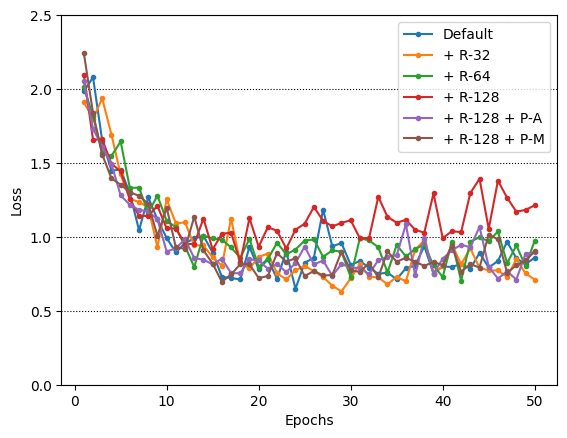

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_resize_32, label="+ R-32", marker=".")
plt.plot(xs, val_losses_resize_64, label="+ R-64", marker=".")
plt.plot(xs, val_losses_resize_128, label="+ R-128", marker=".")
plt.plot(xs, val_losses_resize_128_pooling_a, label="+ R-128 + P-A", marker=".")
plt.plot(xs, val_losses_resize_128_pooling_m, label="+ R-128 + P-M", marker=".")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

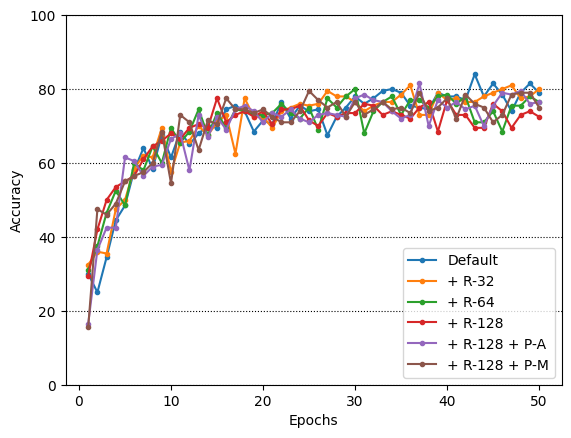

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_resize_32, label="+ R-32", marker=".")
plt.plot(xs, test_accs_resize_64, label="+ R-64", marker=".")
plt.plot(xs, test_accs_resize_128, label="+ R-128", marker=".")
plt.plot(xs, test_accs_resize_128_pooling_a, label="+ R-128 + P-A", marker=".")
plt.plot(xs, test_accs_resize_128_pooling_m, label="+ R-128 + P-M", marker=".")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()